In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import timeit
import os
from datetime import datetime

In [3]:
start = timeit.default_timer()

In [4]:

# Pressure Data (Float in Torr) and Time (Float in ms)
pTime = []
Pressure = []
# Cycles (int)
cycles = []

# File paths (String)
pressureFilePath = "/Users/andrew/Desktop/SNF Projects/Tool-Data/Pressure-Data/2024_06_13-12-56_Al2O3 - STANDARD.txt"
pressureDirPath = "/Users/andrew/Desktop/SNF Projects/Tool-Data/Pressure-Data"

# Recipe Info
recipe = ""
recipes = ["Al2O3", "TiO2", "HfO2", "ZrO2", "ZnO", "Ru", "Pt", "Ta2O5"]
ingredientStack = []


# Reads through directory and prints out how many of each recipe is in the directory
def readDir():
    path = pressureDirPath
    try:
        dir_list = os.listdir(path)
        parseTitles(dir_list)
    except NotADirectoryError:
        print("DIRECTORY NOT FOUND, PROCESS ABORTED. \n Hint: Try putting in a valid directory path.")
        return


# Reads through the txt file and prints out the recipe, pressure, time, and cycles
def readFile():

    path = pressureFilePath
    global recipe
    empty = True
    iter = 0

    try:
        foobar = open(path)
    except FileNotFoundError:
        print("FILE NOT FOUND, PROCESS ABORTED. \n Hint: Try putting in a valid file path.")
        return

    with open(path, "r") as file:
        for line in file:
            data = line.strip().replace(" - ", " ").split()
            try:
                foobar = data[0]
            except IndexError:
                continue
            if data[0] == "Pressure":
                continue
            
            if iter == 1:
                for i in range(data.__len__() - 3):
                    recipe += data[i+3] + " "
                recipe = recipe.strip()
                for key in ingredientStack:
                    if recipe.find(key) != -1:
                        recipe = key

            empty = False
            pTime.append(float(data[0]))
            Pressure.append(float(data[1]))
            cycles.append(int(data[2]))

            iter += 1

    if not empty:
        print("Completed Cycles:", (cycles[0] - cycles[-1] + 1),  "/", cycles[0])


# Parses through the titles of the files and counts how many of each recipe is in the directory
def parseTitles(dir_list):
    try:
        foobar = dir_list[0]
    except IndexError:
        print("DIRECTORY IS EMPTY, PROCESS ABORTED. \n Hint: Try putting in a directory with files.")
        return

    for i in dir_list:
        title = i.lower()
        for j in range(recipes.__len__()):
            if title.find(recipes[j].lower()) != -1:
                ingredientStack.append(recipes[j])
                break
        if (title.find("standby") == -1) and (title.find("pulse") == -1):
            ingredientStack.append("Unknown")
    
    print("Most Recent:", ingredientStack)



def main():
    print("PRESSURE REPORT AT" , datetime.now().strftime("%H:%M:%S"), 
          "ON", datetime.now().strftime("%m/%d/%Y"))
    print("-----------------------------------------")
    readFile()
    print("Recipe:", recipe.upper())
    readDir()


if __name__ == "__main__":
    main()

PRESSURE REPORT AT 15:04:14 ON 06/20/2024
-----------------------------------------
Completed Cycles: 101 / 100
Recipe: AL2O3 STANDARD
Most Recent: ['Al2O3', 'Unknown', 'TiO2', 'Unknown', 'Al2O3', 'TiO2', 'Unknown', 'TiO2', 'Unknown', 'TiO2', 'Unknown', 'Unknown', 'TiO2', 'Unknown', 'Al2O3', 'Unknown']


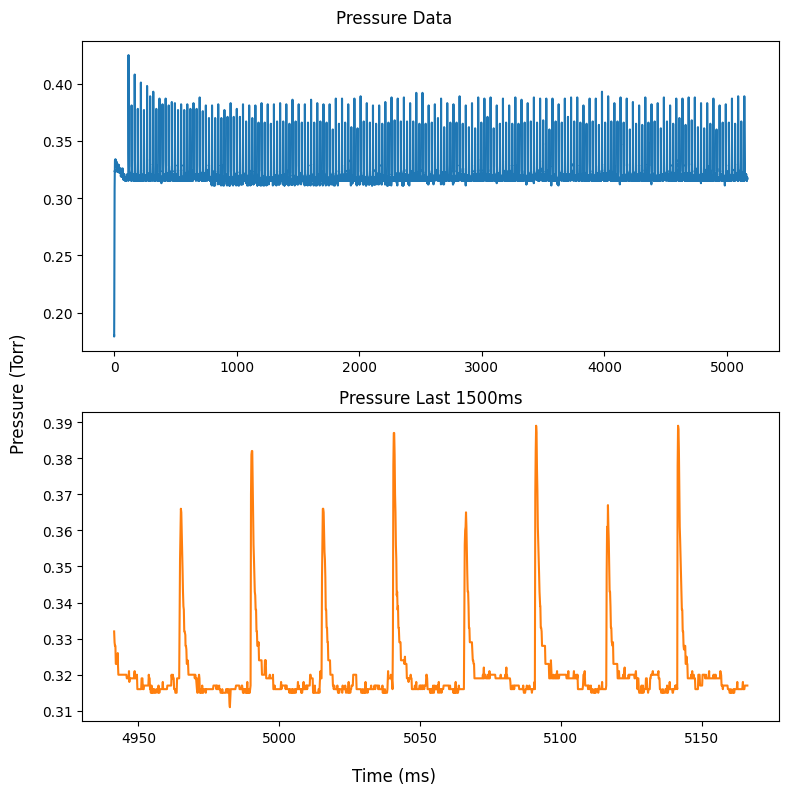

In [5]:

# Plotting the Pressure vs Time
if (pTime.__len__() > 0):
    if (pTime.__len__() < 1500):
        fig, ax = plt.subplots()
        fig.suptitle('Pressure Data')
        fig.set_size_inches(8, 8)
        fig.supxlabel('Time (ms)')
        fig.supylabel('Pressure (Torr)')
        ax.plot(pTime, Pressure)
        fig.tight_layout()
        plt.show()
        fig.savefig("Output_Plots/PressureData.png")

    else:
        lastP = Pressure[-1500:]
        lastT = pTime[-1500:]
        fig, ax = plt.subplots(2, 1)
        fig.suptitle('Pressure Data')
        fig.set_size_inches(8, 8)
        fig.supxlabel('Time (ms)')
        fig.supylabel('Pressure (Torr)')
        ax[0].plot(pTime, Pressure, 'tab:blue')
        ax[1].set_title('Pressure Last 1500ms')
        ax[1].plot(lastT, lastP, 'tab:orange', linestyle='solid')
        fig.tight_layout()
        plt.show()
        fig.savefig("Output_Plots/PressureData.png")

else:
    print("NO DATA TO PLOT, PROCESS ABORTED. \n Hint: Try putting in a file with data.")


In [6]:

# Heater Data (Floats in Celcius) and Time (Float in s)
hTime = []
trap = []
stopValve = []
outerHeater = []
innerHeater = []
pManifold = []
precursors = [[], [], [], [], []]
mfc1 = []
numPrecursors = 0

# Cycles (int)
cycles = []

# File Paths (String)
heatingFilePath = "/Users/andrew/Desktop/SNF Projects/Tool-Data/Heating-Data/2024_06_14-11-23_100c_tio2.txt"
heatingDirPath = "/Users/andrew/Desktop/SNF Projects/Tool-Data/Heating-Data"

# Recipe Info
currentRecipe = ""
ingredientStack = []
recipes = ["Al2O3", "TiO2", "HfO2", "ZrO2", "ZnO", "Ru", "Pt", "Ta2O5"]



# Reads through directory and prints out how many of each recipe is in the directory
def readDir():
    path = heatingDirPath
    try:
        dir_list = os.listdir(path)
        parseTitles(dir_list)
    except NotADirectoryError:
        print("DIRECTORY NOT FOUND, PROCESS ABORTED. \n Hint: Try putting in a valid directory path.")
        return


# Reads through the txt file and prints out the recipe, pressure, time, and cycles
def readFile():
    path = heatingFilePath
    global currentRecipe
    global numPrecursors
    # If the file is empty
    empty = True
    # Iterator to find line 1 of file, which contains the recipe name at the end
    iter = 0

    try:
        foobar = open(path)
    except FileNotFoundError:
        print("FILE NOT FOUND, PROCESS ABORTED. \n Hint: Try putting in a valid file path.")
        return

    # main loop to read through the file line by line
    with open(path, "r") as file:
        for line in file:
            data = line.strip().split()
            try:
                foobar = data[0]
            except IndexError:
                continue
            if data[0] == "Heater":
                continue
            
            # If the file is not empty, record the data
            empty = False
            hTime.append(float(data[0]))
            trap.append(float(data[1]))
            stopValve.append(float(data[2]))
            outerHeater.append(float(data[3]))
            innerHeater.append(float(data[4]))
            pManifold.append(float(data[5]))
            

            # Find the number of precursors
            index = 6
            while float(data[index]) < 1000:
                index += 1
            numPrecursors = index - 6
            # Record the precursor data
            for j in range(numPrecursors):
                precursors[j].append(float(data[j+6]))

            # record mfc1 and cycles data which is after the precursor data
            mfc1.append(float(data[index+1]))
            cycles.append(int(data[index+3]))

            iter += 1
            # Find the recipe name
            if iter == 1:
                for j in range(index + 4, data.__len__(), 1):
                    currentRecipe += data[j] + " "
                currentRecipe = currentRecipe.strip()
                for key in ingredientStack:
                    if currentRecipe.find(key) != -1:
                        currentRecipe = key


    # if the file is not empty, print out the data
    if not empty:
        print("Completed Cycles:", (cycles[0] - cycles[-1] + 1),  "/", cycles[0])
        print("Number of Precursors:", numPrecursors)
        print("Inner Heater Final Temp:", str(innerHeater[-1]) + "\u00b0 C")
        print("Outer Heater Final Temp:", str(outerHeater[-1]) + "\u00b0 C")
        averageTemp()


# Parses through the titles of the files and counts how many of each recipe is in the directory
def parseTitles(dir_list):
    try:
        foobar = dir_list[0]
    except IndexError:
        print("DIRECTORY IS EMPTY, PROCESS ABORTED. \n Hint: Try putting in a directory with files.")
        return

    for i in dir_list:
        title = i.lower()
        for j in range(recipes.__len__()):
            if title.find(recipes[j].lower()) != -1:
                ingredientStack.append(recipes[j])
                break
        if (title.find("standby") == -1) and (title.find("pulse") == -1):
            ingredientStack.append("Unknown")
    
    print("Most Recent:", ingredientStack)


# Helper method to calculate the average temperature of each precursor
def averageTemp():
    for i in range(numPrecursors):
        sum = 0
        for j in range(precursors[i].__len__()):
            sum += precursors[i][j]
        print("Average Temp of Precursor", i+1, ":", str(round(sum/precursors[i].__len__(), 1)) +  "\u00b0 C")


def main():
    print("----------------------------------------")
    print("HEATING REPORT AT" , datetime.now().strftime("%H:%M:%S"), 
          "ON", datetime.now().strftime("%m/%d/%Y"))
    print("----------------------------------------")
    readFile()
    print("Recipe:", currentRecipe.upper())
    readDir()


if __name__ == "__main__":
    main()

----------------------------------------
HEATING REPORT AT 15:04:14 ON 06/20/2024
----------------------------------------
Completed Cycles: 550 / 550
Number of Precursors: 3
Inner Heater Final Temp: 100.0° C
Outer Heater Final Temp: 99.9° C
Average Temp of Precursor 1 : 75.0° C
Average Temp of Precursor 2 : 25.4° C
Average Temp of Precursor 3 : 25.7° C
Recipe: 100C_TIO2
Most Recent: ['Al2O3', 'Unknown', 'TiO2', 'Unknown', 'Al2O3', 'TiO2', 'Unknown', 'TiO2', 'Unknown', 'TiO2', 'Unknown', 'Unknown', 'TiO2', 'Unknown']


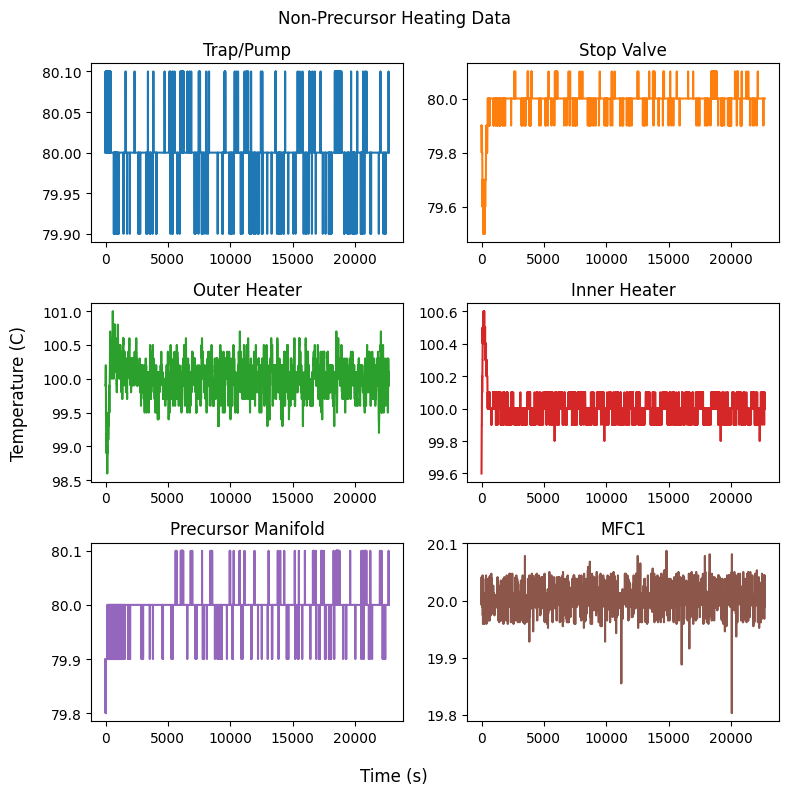

In [7]:
# Graph the Non-Precursor Temperature Data
fig, axs = plt.subplots(3, 2)
fig.suptitle('Non-Precursor Heating Data')
fig.supxlabel('Time (s)')
fig.supylabel('Temperature (C)')
fig.set_size_inches(8, 8)
axs[0, 0].plot(hTime, trap, 'tab:blue')
axs[0, 0].set_title('Trap/Pump')
axs[0, 1].plot(hTime, stopValve, 'tab:orange')
axs[0, 1].set_title('Stop Valve')
axs[1, 0].plot(hTime, outerHeater, 'tab:green')
axs[1, 0].set_title('Outer Heater')
axs[1, 1].plot(hTime, innerHeater, 'tab:red')
axs[1, 1].set_title('Inner Heater')
axs[2, 0].plot(hTime, pManifold, 'tab:purple')
axs[2, 0].set_title('Precursor Manifold')
axs[2, 1].plot(hTime, mfc1, 'tab:brown')
axs[2, 1].set_title('MFC1')
fig.tight_layout()
fig.savefig('Output_Plots/Non-Precursor Heating Data.png')
plt.show()


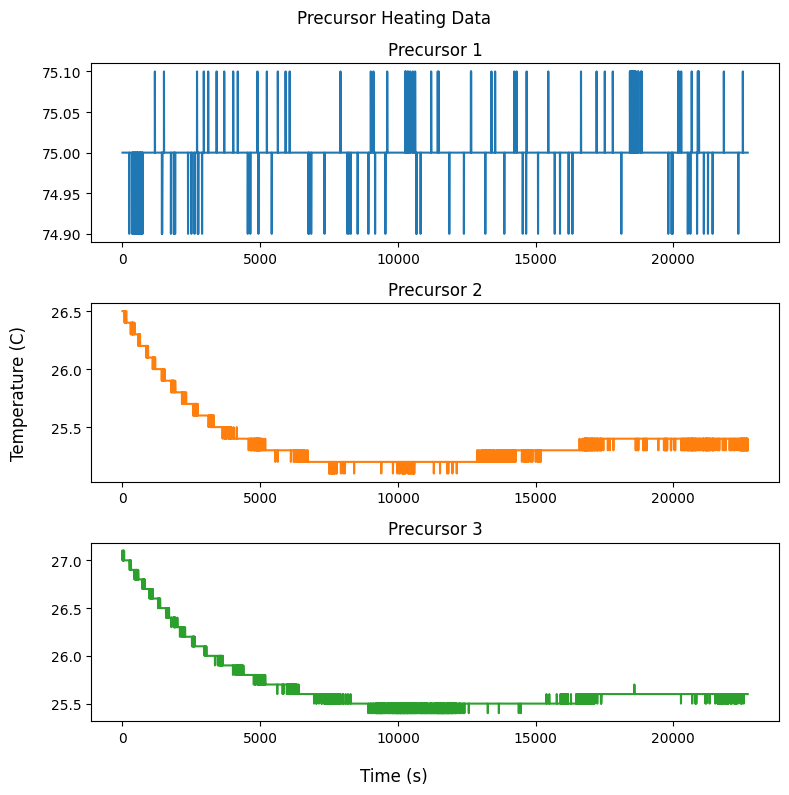

In [8]:
# Graph the Precursor Temperature Data
if numPrecursors != 0:
    fig, axs = plt.subplots(numPrecursors, 1)
    fig.suptitle('Precursor Heating Data')
    fig.supxlabel('Time (s)')
    fig.supylabel('Temperature (C)')
    fig.set_size_inches(8, 8)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    for i in range(numPrecursors):
        axs[i].plot(hTime, precursors[i], colors[i])
        axs[i].set_title('Precursor ' + str(i + 1))
    fig.tight_layout()
    fig.savefig('Output_Plots/Precursor Heating Data.png')
    plt.show()

else:
    print("Graphing Aborted: No Precursor Data")

In [9]:
# Runtime Analysis
stop = timeit.default_timer()
print('TOTAL RUNTIME: ', round(stop - start, 3), "s")

TOTAL RUNTIME:  1.699 s
